In [1]:
import numpy as np
import pandas as pd
import FSProgram #importing the data preparation module
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE 
from sklearn.model_selection import cross_val_score

**Getting the data**

In [2]:
data = pd.read_csv("dataset.tsv", sep="\t")
rules = []
with open('rules.txt', 'r', encoding='utf-8') as file:
    for line in file:
        rules.append(line.strip())

In [3]:
data = FSProgram.preprocess_data(data, rules)

c:\Users\Nitro\Desktop\JBInternshipApp\FSProgram.py:35: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(df.mode().iloc[0])


In [4]:
#count the number of values in the "donor_is_old" column
data["donor_is_old"].value_counts()

#values are balanced, so we can use accuracy as a metric

donor_is_old
True     20
False    19
Name: count, dtype: int64

**Feature Selection methods**

In [5]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif

In [6]:
y = data["donor_is_old"]
X = data.drop(columns=["donor_is_old"])

1. Boruta

In [ ]:
rf = RandomForestClassifier(n_jobs=-1, max_depth=5)
boruta = BorutaPy(rf, n_estimators='auto', verbose=2)
boruta.fit(X, y)

selected_features_Boruta = X.columns[boruta.support_]
#print(len(selected_features_Boruta))

#Featrure importance ranking based on Boruta
ranking_Boruta = pd.DataFrame({
    "feature": X.columns,
    "importance": boruta.ranking_
}).sort_values(by="importance")
#print(ranking_Boruta)



Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	14
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	14
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	14
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	14
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	32
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	32
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	32
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	32
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	12
Reject

In [ ]:
resultlist = [0 for _ in range(len(X.columns))]
for i in range(1,10):
    rf = RandomForestClassifier(n_jobs=-1, max_depth=5)
    boruta = BorutaPy(rf, n_estimators='auto', verbose=2)
    boruta.fit(X, y)
    resultlist += boruta.support_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	51
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	30
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	30
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	30
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	17
Rejected: 	30
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	14
Rejected: 	33
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	14
Rejected: 	33
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	14
Rejected: 	33
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	14
Rejected: 	33
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	12
Reject

In [24]:
boruta.support_.astype(int) + boruta.support_.astype(int)

array([2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 2])

In [29]:
ranking_Boruta = pd.DataFrame({
    "feature": X.columns,
    "importance": resultlist
}).sort_values(by="importance")
print(ranking_Boruta)


                                              feature  importance
25                      NOT IFN_γ AND NOT Lymphocytes           0
23                                               IL_8           0
46                                          Monocytes           0
49                   NOT IL_12p70 AND NOT Lymphocytes           0
26                            NOT Notch_1 AND NOT RBC           0
45          NOT HCT AND NOT Monocytes AND NOT Notch_1           0
28                            NOT HCT AND NOT Notch_1           0
29                            NOT Lymphocytes_percent           0
30                                          Basophils           0
31                                    NOT Lymphocytes           0
32                               NOT Hb AND NOT IFN_γ           0
44                               NOT Hb AND NOT IL_10           0
34                              NOT Basophils_percent           0
43                            NOT Hb AND NOT IL_12p70           0
36        

In [17]:
ranking_Boruta

,feature,importance
0,Monocytes AND NOT sCD86,1
42,NOT Hb AND NOT Lymphocytes,1
41,NOT HCT AND NOT Lymphocytes AND NOT Notch_1,1
35,Neutrophils,1
33,NOT Lymphocytes_percent AND NOT Notch_1,1
27,GDF_15,1
24,NOT Lymphocytes AND NOT Notch_1,1
13,NOT Hb AND NOT Lymphocytes AND NOT Notch_1,1
12,NOT Hb AND NOT Lymphocytes_percent,1
50,NOT Basophils_percent AND NOT Lymphocytes AND ...,1


2. MI 

In [11]:
mi_scores = mutual_info_classif(X, y)
mi_ranking = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

selected_features_mi = X.columns[mi_scores > 0.1]  #might vary dependently on the importance threshold

3. RFE

In [ ]:
model = LogisticRegression(random_state=0, penalty = "l1", solver = "liblinear")
selector = RFE(model, n_features_to_select=10) 
data_reduced = selector.fit_transform(X, y)

selected_features_RFE = X.columns[selector.support_]

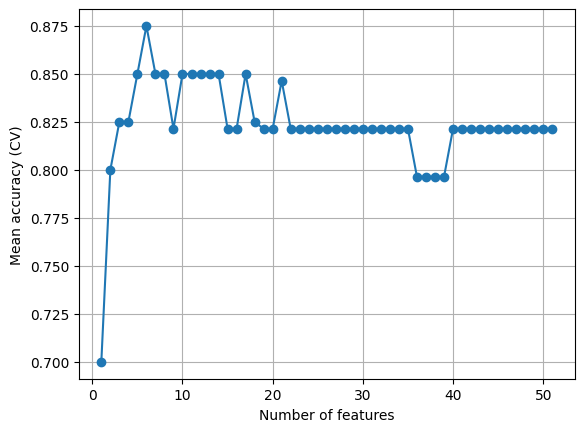

In [7]:
#Crossvalidation to find the best number of features
max_features = X.shape[1]  
cv_folds = 5  
model = LogisticRegression(random_state=42)

feature_counts = range(1, max_features + 1)
cv_scores = []

for n_features in feature_counts:
    rfe = RFE(model, n_features_to_select=n_features)
    scores = cross_val_score(rfe, X, y, cv=cv_folds, scoring="accuracy")  
    cv_scores.append(np.mean(scores)) 

optimal_features = feature_counts[np.argmax(cv_scores)]

plt.plot(feature_counts, cv_scores, marker="o")
plt.xlabel("Number of features")
plt.ylabel("Mean accuracy (CV)")
plt.grid()
plt.show()


In [ ]:
#Based on that graph we could change the number of features depending on our desire to have more or less of them

In [12]:
print(len(selected_features_mi))
print(len(selected_features_Boruta))
print(len(selected_features_RFE))

17
11
10


In [13]:
l_all = []
l_borifre = []
l_Boruta = []
l_mi = []
l_RFE = []
l_none = []

for i in X.columns:
    if i in selected_features_Boruta and i in selected_features_mi:
        l_all.append(i)
    elif i in selected_features_Boruta and i in selected_features_RFE:
        l_borifre.append(i)
    elif i in selected_features_Boruta:
        l_Boruta.append(i)
    elif i in selected_features_mi:
        l_mi.append(i)
    elif i in selected_features_RFE:
        l_RFE.append(i)
    else:
        l_none.append(i)

In [14]:
print("Features selected by both methods: ", l_all)
print("Total: ", len(l_all))
print("Features selected by Boruta and RFE: ", l_borifre)
print("Total: ", len(l_borifre))
print("Features selected by Boruta: ", l_Boruta)
print("Total: ", len(l_Boruta))
print("Features selected by RFE: ", l_RFE)
print("Total: ", len(l_RFE))
print("Features selected by mutual information: ", l_mi)
print("Total: ", len(l_mi))
print("Features selected by none of the methods: ", l_none)
print("Total: ", len(l_none))

Features selected by both methods:  ['NOT Hb AND NOT Notch_1', 'NOT Hb AND NOT Lymphocytes AND NOT Notch_1', 'NOT Lymphocytes AND NOT Notch_1', 'GDF_15', 'NOT Lymphocytes_percent AND NOT Notch_1', 'Neutrophils', 'NOT HCT AND NOT Lymphocytes AND NOT Notch_1', 'NOT Hb AND NOT Lymphocytes', 'NOT Basophils_percent AND NOT Lymphocytes AND NOT Notch_1']
Total:  9
Features selected by Boruta and RFE:  []
Total:  0
Features selected by Boruta:  ['Monocytes AND NOT sCD86', 'NOT Hb AND NOT Lymphocytes_percent']
Total:  2
Features selected by RFE:  ['SOST', 'Basophils', 'NOT Hb AND NOT IL_2']
Total:  3
Features selected by mutual information:  ['NOT Hb AND NOT Monocytes AND NOT Notch_1', 'OMD', 'Eosinophils', 'NOT Basophils_percent AND NOT Notch_1', 'NOT Basophils_percent AND NOT IL_12p70', 'NOT Hb AND NOT IFN_γ', 'NOT Basophils AND NOT Lymphocytes AND NOT Notch_1', 'IL_1β']
Total:  8
Features selected by none of the methods:  ['TNF_α', 'IL_10', 'NOT Notch_1', 'WBC', 'NOT IL_4 AND NOT Lymphocytes

4. Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True, max_len=3, low_memory=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

print(frequent_itemsets)
print(rules)

        support                                           itemsets
0      0.205128                          (Monocytes AND NOT sCD86)
1      0.256410                                            (TNF_α)
2      0.358974         (NOT Hb AND NOT Monocytes AND NOT Notch_1)
3      0.256410                                              (OMD)
4      0.564103                           (NOT Hb AND NOT Notch_1)
...         ...                                                ...
15390  0.307692  (NOT Basophils AND NOT Lymphocytes AND NOT Not...
15391  0.256410  (NOT Basophils AND NOT Lymphocytes AND NOT Not...
15392  0.307692  (NOT Basophils AND NOT Lymphocytes AND NOT Not...
15393  0.102564  (IL_1β, donor_is_old, NOT Basophils_percent AN...
15394  0.307692  (donor_is_old, NOT Basophils_percent AND NOT L...

[15395 rows x 2 columns]
                                             antecedents  \
0                              (Monocytes AND NOT sCD86)   
1                              (Monocytes AND NOT 